In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = [
    {"Date": "2024-01-05", "Category": "Food", "Amount": 300},
    {"Date": "2024-01-12", "Category": "Transport", "Amount": 150},
    {"Date": "2024-01-20", "Category": "Entertainment", "Amount": 200},
    {"Date": "2024-02-03", "Category": "Food", "Amount": 320},
    {"Date": "2024-02-15", "Category": "Transport", "Amount": 180},
    {"Date": "2024-02-25", "Category": "Shopping", "Amount": 250},
    {"Date": "2024-03-08", "Category": "Food", "Amount": 350},
    {"Date": "2024-03-18", "Category": "Bills", "Amount": 500},
    {"Date": "2024-03-25", "Category": "Entertainment", "Amount": 220},
    {"Date": "2024-04-02", "Category": "Food", "Amount": 330},
    {"Date": "2024-04-10", "Category": "Transport", "Amount": 160},
    {"Date": "2024-04-22", "Category": "Shopping", "Amount": 400},
]

In [3]:
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"])

In [4]:
monthly_expenses = df.groupby(pd.Grouper(key="Date", freq="MS"))["Amount"].sum()

print("Monthly totals:\n", monthly_expenses)

Monthly totals:
 Date
2024-01-01     650
2024-02-01     750
2024-03-01    1070
2024-04-01     890
Freq: MS, Name: Amount, dtype: int64


In [18]:
FORECAST_MONTHS = 12

In [19]:
rolling_avg = monthly_expenses.rolling(window=3).mean().iloc[-1]
future_dates = pd.date_range(start=monthly_expenses.index[-1] + pd.offsets.MonthBegin(1),
                             periods=FORECAST_MONTHS, freq="MS")
forecast_rolling = pd.Series([rolling_avg]*FORECAST_MONTHS, index=future_dates, name="Rolling_Avg")

In [20]:
monthly_changes = np.diff(monthly_expenses.values)
avg_growth = np.mean(monthly_changes)
forecast_trend = pd.Series([monthly_expenses.iloc[-1] + (i+1)*avg_growth for i in range(FORECAST_MONTHS)],
                           index=future_dates, name="Trend")

In [21]:
results = pd.concat([forecast_rolling, forecast_trend], axis=1)

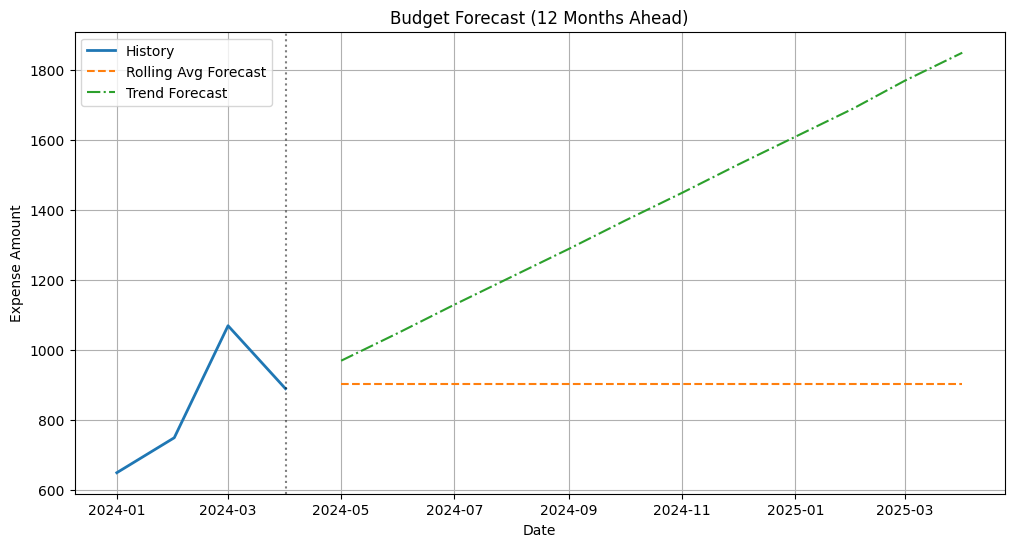

In [22]:
plt.figure(figsize=(12,6))
plt.plot(monthly_expenses.index, monthly_expenses.values, label="History", linewidth=2)
plt.plot(forecast_rolling.index, forecast_rolling.values, "--", label="Rolling Avg Forecast")
plt.plot(forecast_trend.index, forecast_trend.values, "-.", label="Trend Forecast")
plt.axvline(monthly_expenses.index[-1], color="k", linestyle=":", alpha=0.5)
plt.title(f"Budget Forecast ({FORECAST_MONTHS} Months Ahead)")
plt.xlabel("Date")
plt.ylabel("Expense Amount")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
print("\nForecast (per month):")
print(results.round(2))


Forecast (per month):
            Rolling_Avg   Trend
2024-05-01       903.33   970.0
2024-06-01       903.33  1050.0
2024-07-01       903.33  1130.0
2024-08-01       903.33  1210.0
2024-09-01       903.33  1290.0
2024-10-01       903.33  1370.0
2024-11-01       903.33  1450.0
2024-12-01       903.33  1530.0
2025-01-01       903.33  1610.0
2025-02-01       903.33  1690.0
2025-03-01       903.33  1770.0
2025-04-01       903.33  1850.0
